**A1: Summation, Activation, and Comparator Units**

In [1]:
# A1: Summation, Activation, and Comparator Units

import numpy as np

# Summation unit
def summation_unit11(inputs, weights, bias):
    return np.dot(inputs, weights) + bias

# Step activation
def step_function11(x):
    return 1 if x >= 0 else 0

# Bipolar Step activation
def bipolar_step_function11(x):
    return 1 if x >= 0 else -1

# Sigmoid activation
def sigmoid_function11(x):
    return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

# TanH activation
def tanh_function11(x):
    return np.tanh(x)

# ReLU activation
def relu_function11(x):
    return max(0, x)

# Leaky ReLU activation
def leaky_relu_function11(x, alpha=0.01):
    return x if x > 0 else alpha * x

# Comparator unit (for error calculation)
def comparator11(expected, predicted):
    return expected - predicted

if __name__ == "__main__":
    inputs = np.array([1, 0])
    weights = np.array([0.5, 0.2])
    bias = 0.2

    net = summation_unit11(inputs, weights, bias)
    pred = step_function11(net)
    expected = 1
    error = comparator11(expected, pred)

    print("Inputs:", inputs)
    print("Net Input:", net)
    print("Predicted:", pred)
    print("Expected:", expected)
    print("Error:", error)

Inputs: [1 0]
Net Input: 0.7
Predicted: 1
Expected: 1
Error: 0


**A2: Perceptron learning for AND Gate with Step activation**

Final Weights: [0.1  0.05]
Final Bias: -0.10000000000000765
Epochs Taken: 130


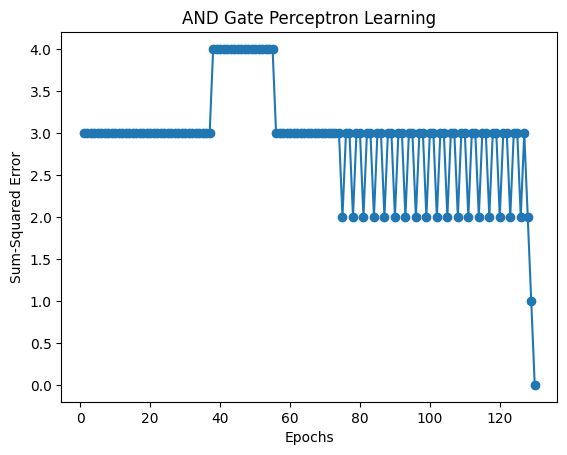

In [2]:
# A2: Perceptron learning for AND Gate with Step activation

import numpy as np
import matplotlib.pyplot as plt

# Step activation
def step_function11(x):
    return 1 if x >= 0 else 0

# Perceptron training for AND Gate
def train_perceptron_AND11(inputs, targets, learning_rate=0.05, max_epochs=1000, tol=0.002):
    weights = np.array([0.2, -0.75])  # Initial weights
    bias = 10                         # Initial bias
    errors = []                       # Store errors per epoch

    for epoch in range(max_epochs):
        total_error = 0
        for x, t in zip(inputs, targets):
            net = np.dot(x, weights) + bias          # Weighted sum
            y = step_function11(net)                   # Predicted output
            error = t - y                            # Error
            weights += learning_rate * error * x     # Update weights
            bias += learning_rate * error            # Update bias
            total_error += error**2                  # Sum squared error
        errors.append(total_error)
        if total_error <= tol:                       # Check convergence
            break
    return weights, bias, errors, epoch+1


if __name__ == "__main__":
    # AND gate truth table
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([0,0,0,1])

    # Train perceptron
    w, b, err, epochs = train_perceptron_AND11(X, y)

    # Print results
    print("Final Weights:", w)
    print("Final Bias:", b)
    print("Epochs Taken:", epochs)

    # Plot error curve
    plt.plot(range(1, len(err)+1), err, marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Sum-Squared Error")
    plt.title("AND Gate Perceptron Learning")
    plt.show()

**A3: Perceptron learning for AND Gate with different activations**

Bipolar Step → Epochs: 1000
Sigmoid → Epochs: 130
ReLU → Epochs: 390


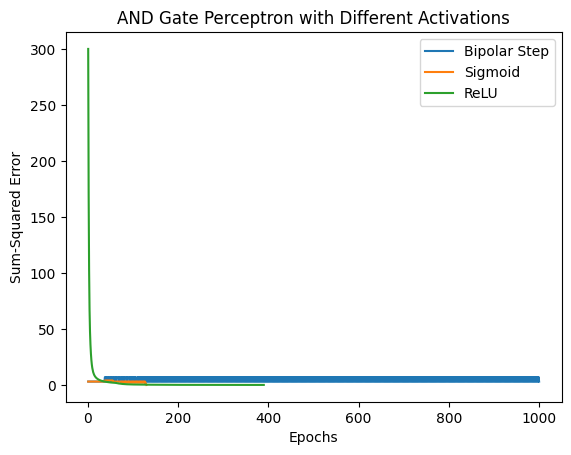

In [3]:
# A3: Perceptron learning for AND Gate with different activations

import numpy as np
import matplotlib.pyplot as plt

# Bipolar Step activation
def bipolar_step_function11(x):
    return 1 if x >= 0 else -1

# Sigmoid activation
def sigmoid_function11(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation
def relu_function11(x):
    return max(0, x)

# Generic perceptron trainer
def train_perceptron11(inputs, targets, activation, learning_rate=0.05, max_epochs=1000, tol=0.002):
    weights = np.array([0.2, -0.75])  # Initial weights
    bias = 10                         # Initial bias
    errors = []                       # Store errors per epoch

    for epoch in range(max_epochs):
        total_error = 0
        for x, t in zip(inputs, targets):
            net = np.dot(x, weights) + bias          # Weighted sum
            y = activation(net)                      # Predicted output
            if activation == sigmoid_function11:       # For sigmoid threshold at 0.5
                y = 1 if y >= 0.5 else 0
            error = t - y                            # Error
            weights += learning_rate * error * x     # Update weights
            bias += learning_rate * error            # Update bias
            total_error += error**2                  # Sum squared error
        errors.append(total_error)
        if total_error <= tol:                       # Check convergence
            break
    return weights, bias, errors, epoch+1

if __name__ == "__main__":
    # AND gate truth table
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([0,0,0,1])

    # Train with Bipolar Step
    w1, b1, err1, e1 = train_perceptron11(X, y, bipolar_step_function11)
    print("Bipolar Step → Epochs:", e1)

    # Train with Sigmoid
    w2, b2, err2, e2 = train_perceptron11(X, y, sigmoid_function11)
    print("Sigmoid → Epochs:", e2)

    # Train with ReLU
    w3, b3, err3, e3 = train_perceptron11(X, y, relu_function11)
    print("ReLU → Epochs:", e3)

    # Plot errors
    plt.plot(range(1, len(err1)+1), err1, label="Bipolar Step")
    plt.plot(range(1, len(err2)+1), err2, label="Sigmoid")
    plt.plot(range(1, len(err3)+1), err3, label="ReLU")
    plt.xlabel("Epochs")
    plt.ylabel("Sum-Squared Error")
    plt.title("AND Gate Perceptron with Different Activations")
    plt.legend()
    plt.show()

**A4: Effect of varying learning rate on convergence for AND Gate**

Learning Rate 0.1 → Epochs: 68
Learning Rate 0.2 → Epochs: 37
Learning Rate 0.3 → Epochs: 23
Learning Rate 0.4 → Epochs: 23
Learning Rate 0.5 → Epochs: 19
Learning Rate 0.6 → Epochs: 19
Learning Rate 0.7 → Epochs: 15
Learning Rate 0.8 → Epochs: 14
Learning Rate 0.9 → Epochs: 13
Learning Rate 1.0 → Epochs: 12


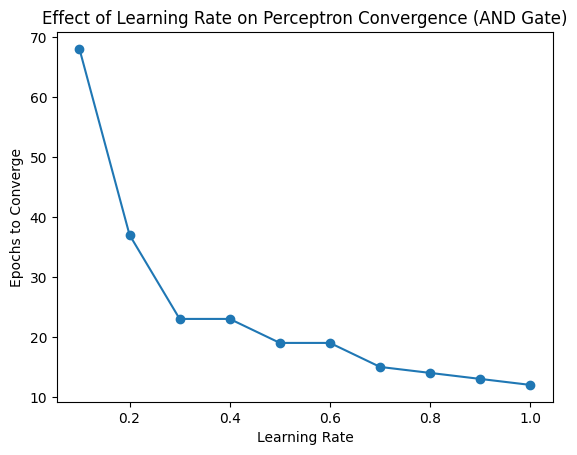

In [4]:
# A4: Effect of varying learning rate on convergence for AND Gate

import numpy as np
import matplotlib.pyplot as plt

# Step activation
def step_function11(x):
    return 1 if x >= 0 else 0

# Perceptron training function
def train_perceptron_lr11(inputs, targets, learning_rate, max_epochs=1000, tol=0.002):
    weights = np.array([0.2, -0.75])  # Initial weights
    bias = 10                         # Initial bias
    for epoch in range(max_epochs):
        total_error = 0
        for x, t in zip(inputs, targets):
            net = np.dot(x, weights) + bias          # Weighted sum
            y = step_function11(net)                   # Predicted output
            error = t - y                            # Error
            weights += learning_rate * error * x     # Update weights
            bias += learning_rate * error            # Update bias
            total_error += error**2                  # Sum squared error
        if total_error <= tol:                       # Check convergence
            return epoch+1                           # Return epochs to converge
    return max_epochs                                # Return max if not converged

if __name__ == "__main__":
    # AND gate truth table
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([0,0,0,1])

    learning_rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] # LR values
    epochs_list = []  # Store epochs for each LR

    for lr in learning_rates:
        epochs = train_perceptron_lr11(X, y, lr)
        epochs_list.append(epochs)
        print(f"Learning Rate {lr} → Epochs: {epochs}")

    # Plot LR vs Epochs
    plt.plot(learning_rates, epochs_list, marker='o')
    plt.xlabel("Learning Rate")
    plt.ylabel("Epochs to Converge")
    plt.title("Effect of Learning Rate on Perceptron Convergence (AND Gate)")
    plt.show()

**A5: Perceptron learning for XOR Gate with different activations**

Step → Epochs: 1000
Bipolar Step → Epochs: 1000
Sigmoid → Epochs: 1000
ReLU → Epochs: 1000


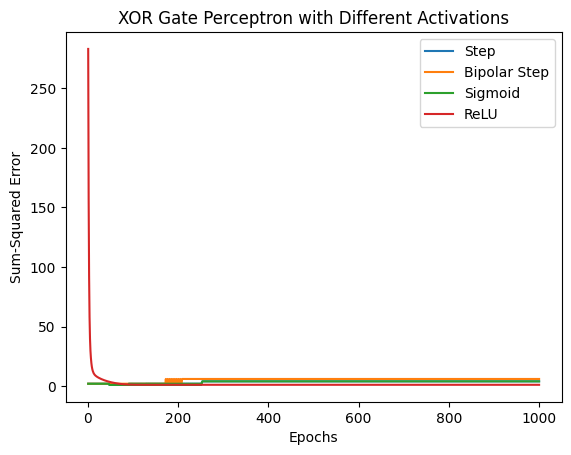

In [5]:
# A5: Perceptron learning for XOR Gate with different activations

import numpy as np
import matplotlib.pyplot as plt

# Step activation
def step_function11(x):
    return 1 if x >= 0 else 0

# Bipolar Step activation
def bipolar_step_function11(x):
    return 1 if x >= 0 else -1

# Sigmoid activation
def sigmoid_function11(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation
def relu_function11(x):
    return max(0, x)

# Generic perceptron trainer
def train_perceptron11(inputs, targets, activation, learning_rate=0.05, max_epochs=1000, tol=0.002):
    weights = np.array([0.2, -0.75])  # Initial weights
    bias = 10                         # Initial bias
    errors = []                       # Store errors per epoch

    for epoch in range(max_epochs):
        total_error = 0
        for x, t in zip(inputs, targets):
            net = np.dot(x, weights) + bias          # Weighted sum
            y = activation(net)                      # Activation output
            if activation == sigmoid_function11:       # Sigmoid threshold
                y = 1 if y >= 0.5 else 0
            error = t - y                            # Error
            weights += learning_rate * error * x     # Update weights
            bias += learning_rate * error            # Update bias
            total_error += error**2                  # Sum squared error
        errors.append(total_error)
        if total_error <= tol:                       # Stop if converged
            break
    return weights, bias, errors, epoch+1

if __name__ == "__main__":
    # XOR gate truth table
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([0,1,1,0])

    # Train with Step
    w1, b1, err1, e1 = train_perceptron11(X, y, step_function11)
    print("Step → Epochs:", e1)

    # Train with Bipolar Step
    w2, b2, err2, e2 = train_perceptron11(X, y, bipolar_step_function11)
    print("Bipolar Step → Epochs:", e2)

    # Train with Sigmoid
    w3, b3, err3, e3 = train_perceptron11(X, y, sigmoid_function11)
    print("Sigmoid → Epochs:", e3)

    # Train with ReLU
    w4, b4, err4, e4 = train_perceptron11(X, y, relu_function11)
    print("ReLU → Epochs:", e4)

    # Plot errors
    plt.plot(range(1, len(err1)+1), err1, label="Step")
    plt.plot(range(1, len(err2)+1), err2, label="Bipolar Step")
    plt.plot(range(1, len(err3)+1), err3, label="Sigmoid")
    plt.plot(range(1, len(err4)+1), err4, label="ReLU")
    plt.xlabel("Epochs")
    plt.ylabel("Sum-Squared Error")
    plt.title("XOR Gate Perceptron with Different Activations")
    plt.legend()
    plt.show()

**A6: Customer transaction classification with Perceptron (Sigmoid activation + Normalization)**

In [6]:
# A6: Customer transaction classification with Perceptron (Sigmoid activation + Normalization)

import numpy as np

# Sigmoid activation with overflow-safe implementation
def sigmoid11(x):
    return 1 / (1 + np.exp(-np.clip(x, -250, 250)))  # clip avoids overflow

# Perceptron training
def train_perceptron_customers11(X, y, learning_rate=0.1, max_epochs=1000, tol=0.002):
    weights = np.random.rand(X.shape[1])  # Random initial weights
    bias = np.random.rand()               # Random initial bias
    errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for xi, target in zip(X, y):
            net = np.dot(xi, weights) + bias     # Weighted sum
            out = sigmoid11(net)                   # Sigmoid output
            pred = 1 if out >= 0.5 else 0        # Threshold at 0.5
            error = target - pred                # Error
            weights += learning_rate * error * xi  # Update weights
            bias += learning_rate * error          # Update bias
            total_error += error**2                # Sum squared error
        errors.append(total_error)
        if total_error <= tol:                   # Convergence check
            break
    return weights, bias, errors, epoch+1

if __name__ == "__main__":
    # Customer dataset
    X = np.array([
        [20,6,2,386],
        [16,3,6,289],
        [27,6,2,393],
        [19,1,2,110],
        [24,4,2,280],
        [22,1,5,167],
        [15,4,2,271],
        [18,4,2,274],
        [21,1,4,148],
        [16,2,4,198]
    ])
    y = np.array([1,1,1,0,1,0,1,1,0,0])  # High Value Yes=1, No=0

    # Min-Max normalization (scale features 0–1)
    X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

    # Train perceptron
    w, b, err, epochs = train_perceptron_customers11(X_norm, y)

    print("Final Weights:", w)
    print("Final Bias:", b)
    print("Epochs Taken:", epochs)

Final Weights: [ 0.20041397  0.16530586 -0.06254142  0.55418751]
Final Bias: -0.29366412907651634
Epochs Taken: 4


**A7: Compare Perceptron vs Pseudo-Inverse on Customer Dataset**

In [7]:
# A7: Compare Perceptron vs Pseudo-Inverse on Customer Dataset

import numpy as np

# Sigmoid activation with safe exp
def sigmoid11(x):
    return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

# Perceptron training (same as A6)
def train_perceptron_customers11(X, y, learning_rate=0.1, max_epochs=1000, tol=0.002):
    weights = np.random.rand(X.shape[1])  # Random initial weights
    bias = np.random.rand()               # Random initial bias
    errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for xi, target in zip(X, y):
            net = np.dot(xi, weights) + bias   # Weighted sum
            out = sigmoid11(net)                 # Sigmoid output
            pred = 1 if out >= 0.5 else 0      # Threshold at 0.5
            error = target - pred              # Error
            weights += learning_rate * error * xi  # Update weights
            bias += learning_rate * error          # Update bias
            total_error += error**2
        errors.append(total_error)
        if total_error <= tol:
            break
    return weights, bias

# Pseudo-inverse solution
def pseudo_inverse_solution(X, y):
    X_bias = np.c_[np.ones((X.shape[0],1)), X]     # Add bias term
    W = np.linalg.pinv(X_bias) @ y                 # Compute weights
    return W

if __name__ == "__main__":
    # Customer dataset
    X = np.array([
        [20,6,2,386],
        [16,3,6,289],
        [27,6,2,393],
        [19,1,2,110],
        [24,4,2,280],
        [22,1,5,167],
        [15,4,2,271],
        [18,4,2,274],
        [21,1,4,148],
        [16,2,4,198]
    ])
    y = np.array([1,1,1,0,1,0,1,1,0,0])

    # Normalize dataset
    X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

    # Train perceptron
    w_p, b_p = train_perceptron_customers11(X_norm, y)
    preds_perceptron = [1 if sigmoid11(np.dot(x, w_p)+b_p) >= 0.5 else 0 for x in X_norm]

    # Solve using pseudo-inverse
    W_pinv = pseudo_inverse_solution(X_norm, y)
    preds_pinv = [1 if val >= 0.5 else 0 for val in (np.c_[np.ones((X_norm.shape[0],1)), X_norm] @ W_pinv)]

    # Print results
    print("Perceptron Predictions:", preds_perceptron)
    print("Pseudo-Inverse Predictions:", preds_pinv)

Perceptron Predictions: [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
Pseudo-Inverse Predictions: [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]


**A8: Backpropagation for AND Gate with Sigmoid activation**

Epochs Taken: 1000
Final Error: 0.16655053180429896
Predictions: [0. 0. 0. 0.]


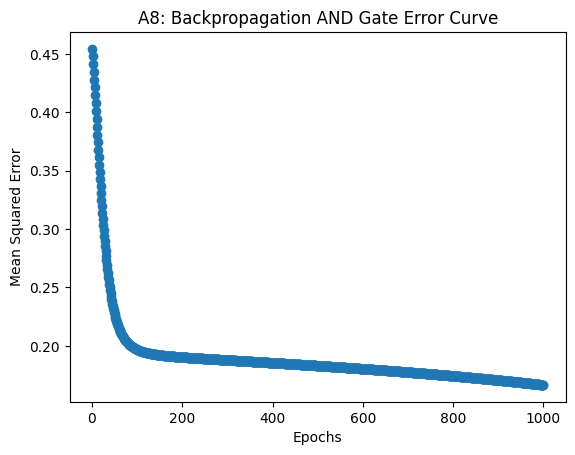

In [8]:
# A8: Backpropagation for AND Gate with Sigmoid activation + Error Plot

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

def sigmoid_derivative(x):
    return x * (1 - x)

def train_backprop_AND(X, y, hidden_neurons=2, learning_rate=0.05, max_epochs=1000, tol=0.002):
    np.random.seed(42)
    input_neurons = X.shape[1]
    output_neurons = 1
    W1 = np.random.rand(input_neurons, hidden_neurons)
    B1 = np.random.rand(hidden_neurons)
    W2 = np.random.rand(hidden_neurons, output_neurons)
    B2 = np.random.rand(output_neurons)
    errors = []

    for epoch in range(max_epochs):
        hidden_input = np.dot(X, W1) + B1
        hidden_output = sigmoid(hidden_input)
        final_input = np.dot(hidden_output, W2) + B2
        final_output = sigmoid(final_input)

        error = y - final_output
        total_error = np.mean(error**2)
        errors.append(total_error)

        d_output = error * sigmoid_derivative(final_output)
        d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)

        W2 += hidden_output.T.dot(d_output) * learning_rate
        B2 += np.sum(d_output, axis=0) * learning_rate
        W1 += X.T.dot(d_hidden) * learning_rate
        B1 += np.sum(d_hidden, axis=0) * learning_rate

        if total_error <= tol:
            break

    return W1, B1, W2, B2, errors, epoch+1

if __name__ == "__main__":
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([[0],[0],[0],[1]])

    W1, B1, W2, B2, errors, epochs = train_backprop_AND(X, y)

    preds = np.round(sigmoid(np.dot(sigmoid(np.dot(X,W1)+B1), W2)+B2).flatten())

    print("Epochs Taken:", epochs)
    print("Final Error:", errors[-1])
    print("Predictions:", preds)

    # Plot error vs epochs
    plt.plot(range(1, len(errors)+1), errors, marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.title("A8: Backpropagation AND Gate Error Curve")
    plt.show()

**A9: Backpropagation for XOR Gate with Sigmoid activation**

Epochs Taken: 1000
Final Error: 0.24978859572114492
Predictions: [0. 1. 0. 1.]


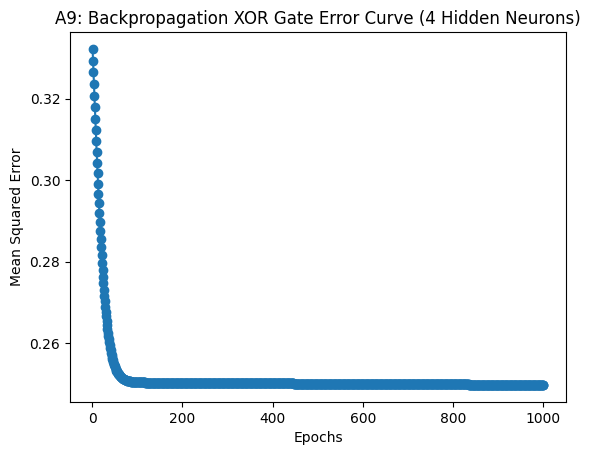

In [9]:
# A9: Backpropagation for XOR Gate with Sigmoid activation + Error Plot

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

def sigmoid_derivative(x):
    return x * (1 - x)

def train_backprop_XOR(X, y, hidden_neurons=4, learning_rate=0.05, max_epochs=1000, tol=0.002):
    np.random.seed(42)
    input_neurons = X.shape[1]
    output_neurons = 1
    W1 = np.random.rand(input_neurons, hidden_neurons)
    B1 = np.random.rand(hidden_neurons)
    W2 = np.random.rand(hidden_neurons, output_neurons)
    B2 = np.random.rand(output_neurons)
    errors = []

    for epoch in range(max_epochs):
        hidden_input = np.dot(X, W1) + B1
        hidden_output = sigmoid(hidden_input)
        final_input = np.dot(hidden_output, W2) + B2
        final_output = sigmoid(final_input)

        error = y - final_output
        total_error = np.mean(error**2)
        errors.append(total_error)

        d_output = error * sigmoid_derivative(final_output)
        d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)

        W2 += hidden_output.T.dot(d_output) * learning_rate
        B2 += np.sum(d_output, axis=0) * learning_rate
        W1 += X.T.dot(d_hidden) * learning_rate
        B1 += np.sum(d_hidden, axis=0) * learning_rate

        if total_error <= tol:
            break

    return W1, B1, W2, B2, errors, epoch+1

if __name__ == "__main__":
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([[0],[1],[1],[0]])

    W1, B1, W2, B2, errors, epochs = train_backprop_XOR(X, y)

    preds = np.round(sigmoid(np.dot(sigmoid(np.dot(X,W1)+B1), W2)+B2).flatten())

    print("Epochs Taken:", epochs)
    print("Final Error:", errors[-1])
    print("Predictions:", preds)

    # Plot error vs epochs
    plt.plot(range(1, len(errors)+1), errors, marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.title("A9: Backpropagation XOR Gate Error Curve (4 Hidden Neurons)")
    plt.show()

**A10: Perceptron/Backprop with 2 output nodes for Logic Gates**

Epochs Taken: 1000
Final Error: 0.18074313527236074
Predictions (Probabilities):
 [[0.73582269 0.2575725 ]
 [0.71960019 0.28447381]
 [0.73023834 0.27676098]
 [0.71537574 0.30075713]]
Predictions (Binary):
 [[1 0]
 [1 0]
 [1 0]
 [1 0]]


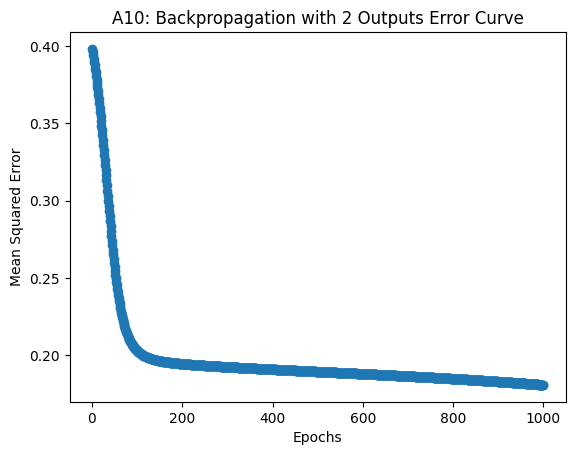

In [10]:
# A10: Backpropagation with 2 output nodes + Error Plot

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

def sigmoid_derivative(x):
    return x * (1 - x)

def train_backprop_2outputs(X, y, hidden_neurons=2, learning_rate=0.05, max_epochs=1000, tol=0.002):
    np.random.seed(42)
    input_neurons = X.shape[1]
    output_neurons = y.shape[1]
    W1 = np.random.rand(input_neurons, hidden_neurons)
    B1 = np.random.rand(hidden_neurons)
    W2 = np.random.rand(hidden_neurons, output_neurons)
    B2 = np.random.rand(output_neurons)
    errors = []

    for epoch in range(max_epochs):
        hidden_input = np.dot(X, W1) + B1
        hidden_output = sigmoid(hidden_input)
        final_input = np.dot(hidden_output, W2) + B2
        final_output = sigmoid(final_input)

        error = y - final_output
        total_error = np.mean(error**2)
        errors.append(total_error)

        d_output = error * sigmoid_derivative(final_output)
        d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)

        W2 += hidden_output.T.dot(d_output) * learning_rate
        B2 += np.sum(d_output, axis=0) * learning_rate
        W1 += X.T.dot(d_hidden) * learning_rate
        B1 += np.sum(d_hidden, axis=0) * learning_rate

        if total_error <= tol:
            break

    return W1, B1, W2, B2, errors, epoch+1

if __name__ == "__main__":
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([[1,0],[1,0],[1,0],[0,1]])

    W1, B1, W2, B2, errors, epochs = train_backprop_2outputs(X, y)

    preds = sigmoid(np.dot(sigmoid(np.dot(X,W1)+B1), W2)+B2)
    preds_binary = (preds == preds.max(axis=1, keepdims=True)).astype(int)

    print("Epochs Taken:", epochs)
    print("Final Error:", errors[-1])
    print("Predictions (Probabilities):\n", preds)
    print("Predictions (Binary):\n", preds_binary)

    # Plot error vs epochs
    plt.plot(range(1, len(errors)+1), errors, marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.title("A10: Backpropagation with 2 Outputs Error Curve")
    plt.show()

**A11: Using sklearn MLPClassifier for AND and XOR Gates**

In [11]:
# A11: Using sklearn MLPClassifier for AND and XOR Gates

import numpy as np
from sklearn.neural_network import MLPClassifier

# AND gate truth table
X_and = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([0,0,0,1])

# XOR gate truth table
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([0,1,1,0])

# Train MLP for AND gate
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd',
                        learning_rate_init=0.1, max_iter=1000, random_state=42)
mlp_and.fit(X_and, y_and)
preds_and = mlp_and.predict(X_and)

# Train MLP for XOR gate
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd',
                        learning_rate_init=0.1, max_iter=1000, random_state=42)
mlp_xor.fit(X_xor, y_xor)
preds_xor = mlp_xor.predict(X_xor)

# Print results
print("AND Gate Predictions:", preds_and)
print("XOR Gate Predictions:", preds_xor)

AND Gate Predictions: [0 0 0 1]
XOR Gate Predictions: [0 0 1 0]


**A12: Using MLPClassifier on Fluency Dataset**

In [12]:
# A12: Using MLPClassifier on Fluency Dataset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("processed_fluency_dataset.csv")

# Separate features and target
y = df['fluency']  # Target

# Automatically select only numeric columns for features
X = df.select_dtypes(include=[np.number])

# Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# Define MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 10),
    activation='relu',
    solver='adam',
    learning_rate_init=0.01,
    max_iter=1000,
    random_state=42
)

# Train model
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Print results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

Confusion Matrix:
 [[181   0   0]
 [  0  21   0]
 [  0   0 324]]

Classification Report:
               precision    recall  f1-score   support

     Average       1.00      1.00      1.00       181
      Fluent       1.00      1.00      1.00        21
        Poor       1.00      1.00      1.00       324

    accuracy                           1.00       526
   macro avg       1.00      1.00      1.00       526
weighted avg       1.00      1.00      1.00       526



Optional Questions

**O1: Vary learning rate for Sigmoid and ReLU activations**

Sigmoid: [68, 23, 19, 15, 13]
ReLU: [187, 49, 21, 1000, 234]


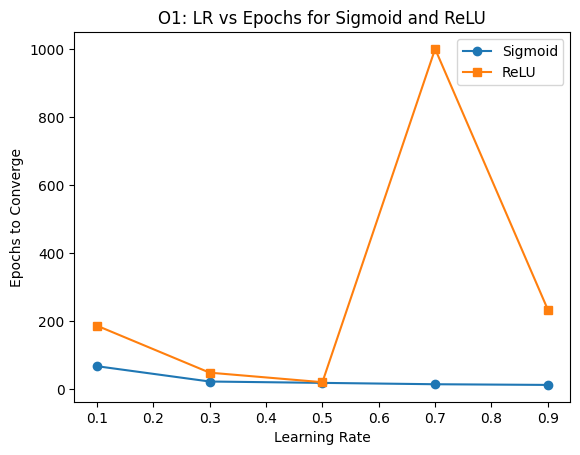

In [13]:
# O1: Vary learning rate for Sigmoid and ReLU activations

import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

# ReLU activation
def relu(x):
    return max(0, x)

# Generic perceptron trainer
def train_perceptron(X, y, activation, learning_rate, max_epochs=1000, tol=0.002):
    weights = np.array([0.2, -0.75])  # Initial weights
    bias = 10                         # Initial bias
    for epoch in range(max_epochs):
        total_error = 0
        for xi, target in zip(X, y):
            net = np.dot(xi, weights) + bias
            out = activation(net)
            if activation == sigmoid:  # Sigmoid threshold
                out = 1 if out >= 0.5 else 0
            error = target - out
            weights += learning_rate * error * xi
            bias += learning_rate * error
            total_error += error**2
        if total_error <= tol:
            return epoch+1
    return max_epochs

if __name__ == "__main__":
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([0,0,0,1])
    learning_rates = [0.1,0.3,0.5,0.7,0.9]
    epochs_sigmoid = [train_perceptron(X,y,sigmoid,lr) for lr in learning_rates]
    epochs_relu = [train_perceptron(X,y,relu,lr) for lr in learning_rates]

    print("Sigmoid:", epochs_sigmoid)
    print("ReLU:", epochs_relu)

    plt.plot(learning_rates, epochs_sigmoid, marker='o', label="Sigmoid")
    plt.plot(learning_rates, epochs_relu, marker='s', label="ReLU")
    plt.xlabel("Learning Rate")
    plt.ylabel("Epochs to Converge")
    plt.title("O1: LR vs Epochs for Sigmoid and ReLU")
    plt.legend()
    plt.show()

**O2: Try other activations (TanH, Leaky ReLU) and repeat O1**

TanH: [1000, 1000, 1000, 1000, 1000]
Leaky ReLU: [207, 54, 23, 58, 1000]


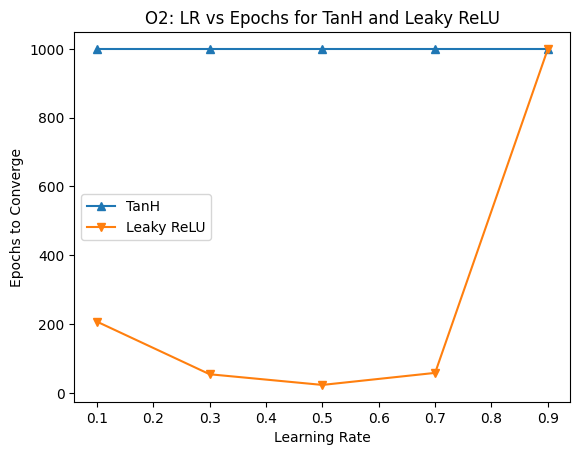

In [14]:
# O2: Vary learning rate for TanH and Leaky ReLU activations

# TanH activation
def tanh(x):
    return np.tanh(x)

# Leaky ReLU activation
def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha*x

# Train with TanH
epochs_tanh = [train_perceptron(X,y,tanh,lr) for lr in learning_rates]

# Train with Leaky ReLU
epochs_leaky = [train_perceptron(X,y,lambda z: leaky_relu(z),lr) for lr in learning_rates]

print("TanH:", epochs_tanh)
print("Leaky ReLU:", epochs_leaky)

plt.plot(learning_rates, epochs_tanh, marker='^', label="TanH")
plt.plot(learning_rates, epochs_leaky, marker='v', label="Leaky ReLU")
plt.xlabel("Learning Rate")
plt.ylabel("Epochs to Converge")
plt.title("O2: LR vs Epochs for TanH and Leaky ReLU")
plt.legend()
plt.show()

**O3: Vary learning rate & activations for A7 (pseudo-inverse) and A8 (backprop)** *italicized text*

In [15]:
# O3: Compare convergence with different LR and activations in A7 & A8

import numpy as np

# safe sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

# train backprop for AND with correct shapes
def train_backprop_AND(X, y, hidden_neurons=2, learning_rate=0.05, max_epochs=1000, tol=0.002):
    np.random.seed(42)                                 # fix randomness
    X = np.array(X, dtype=float)                       # ensure float array
    y = np.array(y, dtype=float).reshape(-1, 1)        # ensure column vector (n,1)
    n_samples, n_features = X.shape                    # get sizes
    W1 = np.random.rand(n_features, hidden_neurons)   # W1 shape (in,hidden)
    B1 = np.random.rand(1, hidden_neurons)            # B1 shape (1,hidden) for broadcasting
    W2 = np.random.rand(hidden_neurons, 1)            # W2 shape (hidden, out=1)
    B2 = np.random.rand(1, 1)                          # B2 shape (1,1) for broadcasting

    for epoch in range(max_epochs):
        hidden_input = np.dot(X, W1) + B1             # (n,hidden)
        h = sigmoid(hidden_input)                     # (n,hidden)
        final_input = np.dot(h, W2) + B2              # (n,1)
        out = sigmoid(final_input)                    # (n,1)

        error = y - out                               # (n,1)
        mse = np.mean(error**2)                       # scalar MSE
        if mse <= tol:                                # check convergence
            return epoch+1

        d_out = error * out * (1 - out)               # (n,1)
        d_hidden = np.dot(d_out, W2.T) * h * (1 - h)  # (n,hidden)

        W2 += np.dot(h.T, d_out) * learning_rate      # (hidden,1)
        B2 += np.sum(d_out, axis=0, keepdims=True) * learning_rate  # (1,1)
        W1 += np.dot(X.T, d_hidden) * learning_rate   # (in,hidden)
        B1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate  # (1,hidden)

    return max_epochs                                   # return max if not converged

if __name__ == "__main__":
    X = np.array([[0,0],[0,1],[1,0],[1,1]])            # AND inputs
    y = np.array([0,0,0,1])                            # AND targets (1-D ok; function reshapes it)

    lr_values = [0.1, 0.3, 0.5]                        # learning rates to test
    for lr in lr_values:
        epochs = train_backprop_AND(X, y, learning_rate=lr)
        print(f"LR={lr} → Backprop epochs={epochs}")

LR=0.1 → Backprop epochs=1000
LR=0.3 → Backprop epochs=1000
LR=0.5 → Backprop epochs=1000
